In [1]:
#%config IPCompleter.use_jedi=False
%load_ext autoreload
%autoreload 2

In [27]:
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

from pandas._libs.tslibs.timestamps import Timestamp
from pandas.core.frame import DataFrame
from pandas.core.series import Series
from matplotlib.axes._axes import Axes

sys.path.append('..')
from cyclingEfficiency import Reader, Paths, Clean
plt.style.use('seaborn-v0_8')

## EDA
Después de la limpieza, se crea una clase 'Clean' que condensa los pasos del notebook anterior. Ahora el objetivo es observar cómo se comportan los datos después de la limpieza.

In [28]:
data = Clean(
    hr_max=190,
    kph_greater=2,
    cad_greater_than_equal=40,
    hr_grater=0,
    slope_greater_than_equal=0,
    zone_grater_than_equal=1,
    before=False
).data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633163 entries, 0 to 633162
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   secs      633163 non-null  int64         
 1   cad       633163 non-null  float64       
 2   hr        633163 non-null  float64       
 3   km        633163 non-null  float64       
 4   kph       633163 non-null  float64       
 5   watts     633163 non-null  float64       
 6   alt       633163 non-null  float64       
 7   lon       633163 non-null  float64       
 8   lat       633163 non-null  float64       
 9   slope     633163 non-null  float64       
 10  temp      633163 non-null  float64       
 11  datetime  633163 non-null  datetime64[ns]
 12  date      633163 non-null  datetime64[ns]
 13  weight    633163 non-null  float64       
 14  zones     633163 non-null  int64         
 15  is_plain  633163 non-null  int64         
dtypes: datetime64[ns](2), float64(11), int

In [29]:
data.describe()

secs            cad             hr             km  \
count  633163.000000  633163.000000  633163.000000  633163.000000   
mean     9183.604629      76.204080     146.044171      39.303430   
std      6376.709386       9.877576      23.068564      25.877314   
min         2.000000      40.000000      95.000000       0.002100   
25%      3619.000000      70.000000     129.000000      17.073250   
50%      8595.000000      77.000000     149.000000      38.137100   
75%     13469.000000      83.000000     165.000000      54.560600   
max     41307.000000     131.000000     195.000000     150.478000   

                 kph          watts           alt            lon  \
count  633163.000000  633163.000000  633163.00000  633163.000000   
mean       15.782106       1.145598    2096.29719     -72.907613   
std         7.051200      14.804708     749.16319       9.987977   
min         2.001600       0.000000       0.00000     -75.326690   
25%        10.584000       0.000000    1396.00000     -74.380611   
50%        13.608000       0.000000    2540.00000     -74.299179   
75%        19.652400       0.000000    2640.55000     -74.199185   
max        62.737200     396.000000    3520.20000       0.000000   

                 lat          slope           temp         weight  \
count  633163.000000  633163.000000  633163.000000  633163.000000   
mean        4.860349       4.884453      17.552740      63.589715   
std         0.698962       3.127410       5.461262       1.647784   
min         0.000000       0.000000       4.000000      60.500000   
25%         4.853763       1.904760      14.000000      62.300000   
50%         4.929498       5.555560      16.000000      63.400000   
75%         5.023120       7.142860      21.000000      64.600000   
max         6.023315      36.555600      40.000000      70.600000   

               zones       is_plain  
count  633163.000000  633163.000000  
mean        2.767687       0.188955  
std         1.359272       0.391473  
min         1.000000       0.000000  
25%         2.000000       0.000000  
50%         2.000000       0.000000  
75%         4.000000       0.000000  
max         5.000000       1.000000

### Análisis Unidimensional
Se realizarán histogramas para observar el comportamiento de las variables más relevantes.
- secs = Segundos de actividad
- cad = Cadencia
- hr = Frecuencia cardíaca
- km = Kilometraje
- kph = Kilómetros por hora
- alt = Altitud
- slope = Desnivel
- temp = Temperatura
- weight = Peso del ciclista
- zones = Zona cardiacar

In [5]:
def hist(
        df: DataFrame, column: str, bins: int='auto',
        hue: str = None
    )-> None:

    format = lambda value, tick_number: '{:,.2f}'.format(value)

    beta_y: float = 0.9
    beta_x: float = 0.01

    mean: float = df[column].mean()
    median: float = df[column].median()
    plt.figure(figsize=(8, 5))
    graph: Axes = sns.histplot(
        data=df,
        x=column,
        bins=bins,
        hue=hue,
        multiple='stack'
    )
    ylim: float = graph.get_ylim()[1]
    graph.yaxis.set_major_formatter(FuncFormatter(format))
    graph.xaxis.set_major_formatter(FuncFormatter(format))
    xrange: float = graph.get_xlim()[1] - graph.get_xlim()[0]

    
    plt.axvline(mean, label='Mean', color='#DD0000')
    plt.axvline(median, label='Median', color='#22AA22')
    plt.text(
        mean + xrange * beta_x, ylim * beta_y, '{:,.2f}'.format(mean)
    )
    plt.text(
        median + xrange * beta_x, ylim * beta_y**2, '{:,.2f}'.format(median)
    )
    plt.title('Hist {}'.format(column.upper()))
    plt.legend()
    plt.show()

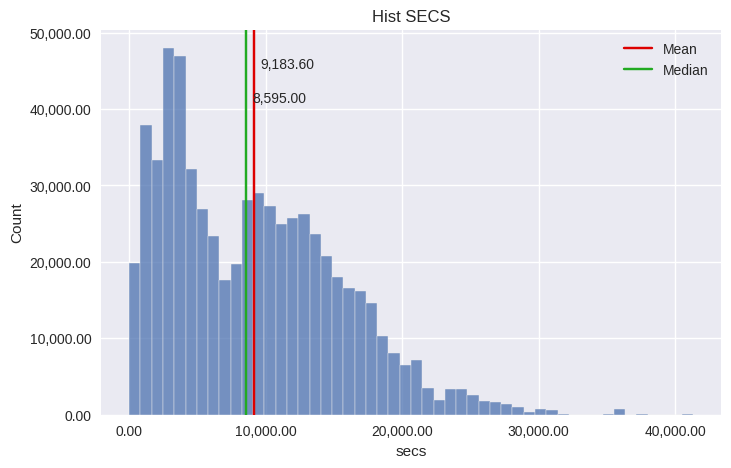

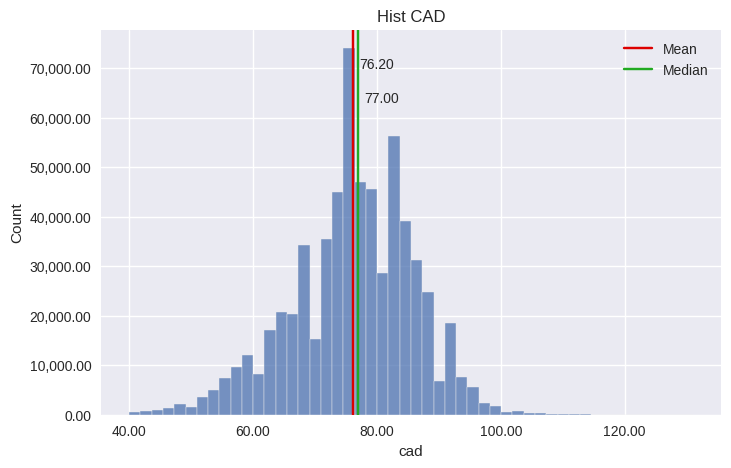

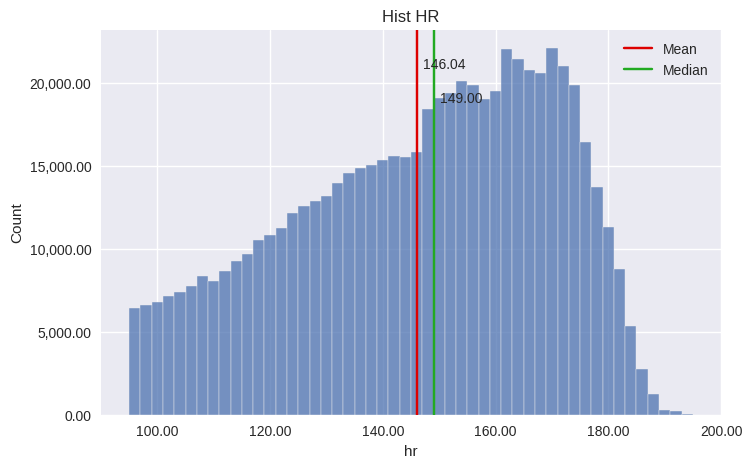

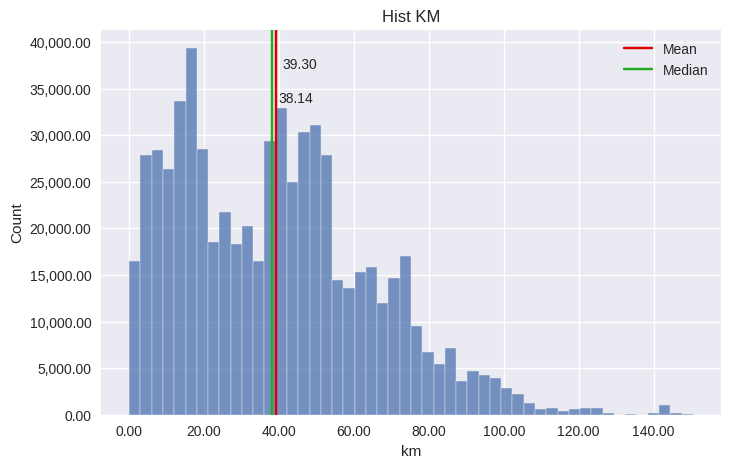

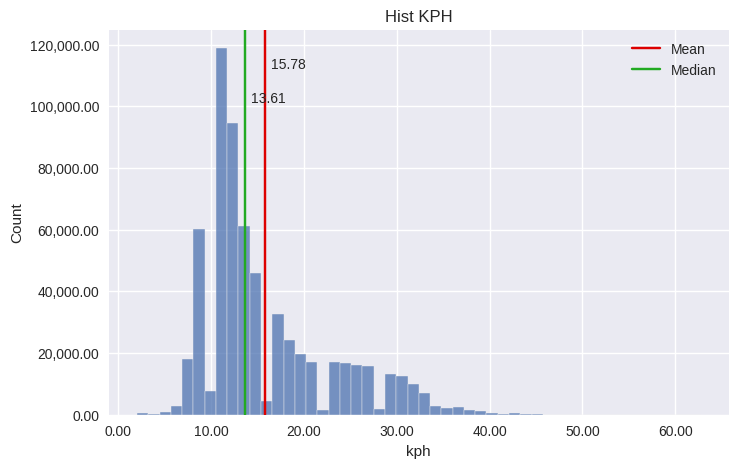

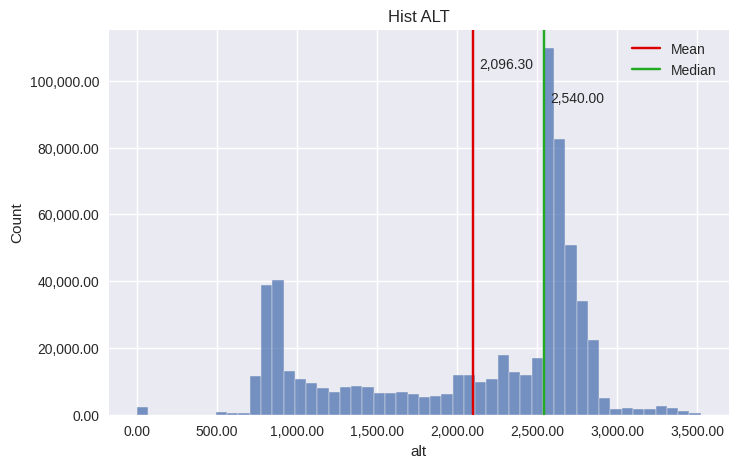

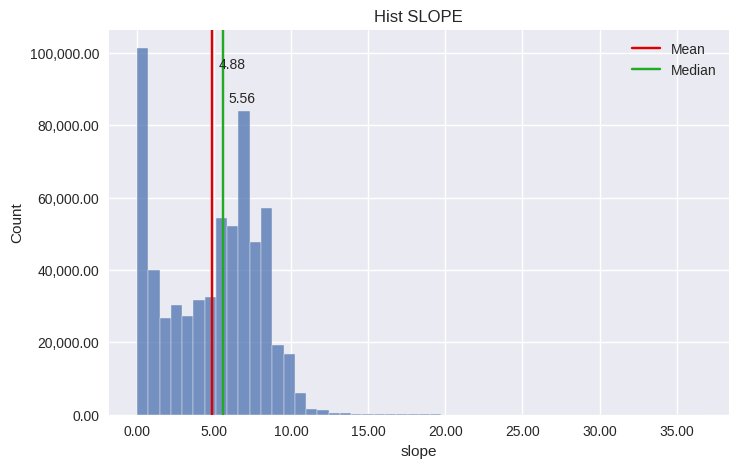

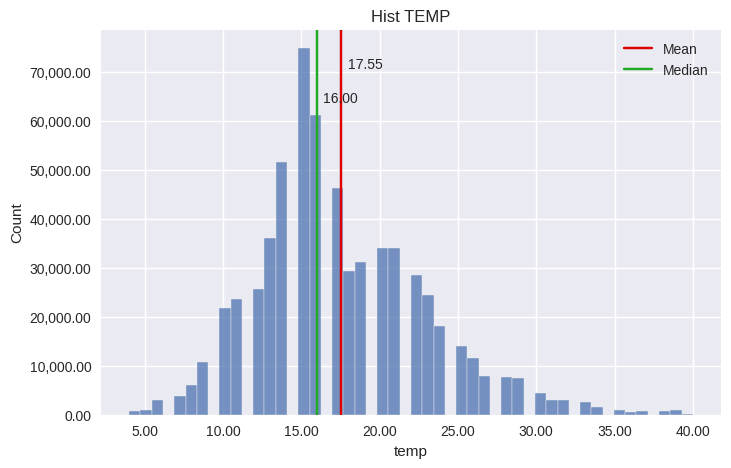

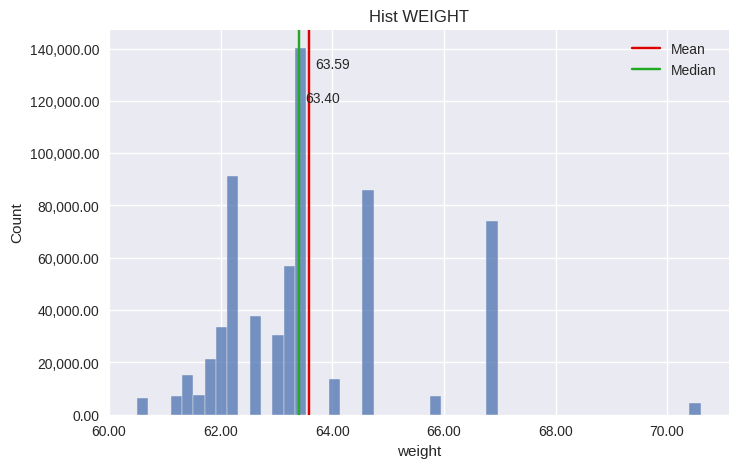

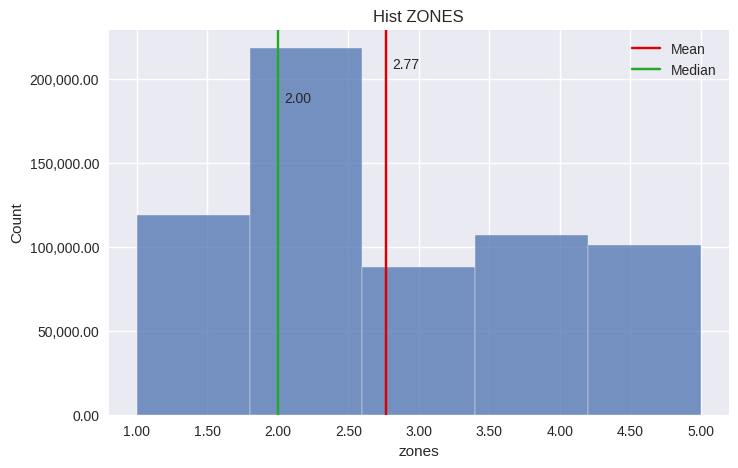

In [30]:
for column in [
    'secs', 'cad', 'hr', 'km', 'kph', 
    'alt', 'slope', 'temp', 'weight',
]:
    hist(data, column, bins=50)

hist(data, 'zones', bins=5)

### Análisis Multidimensional
Para este punto, se graficarán las variables que suponemos pueden tener una mayor relación.

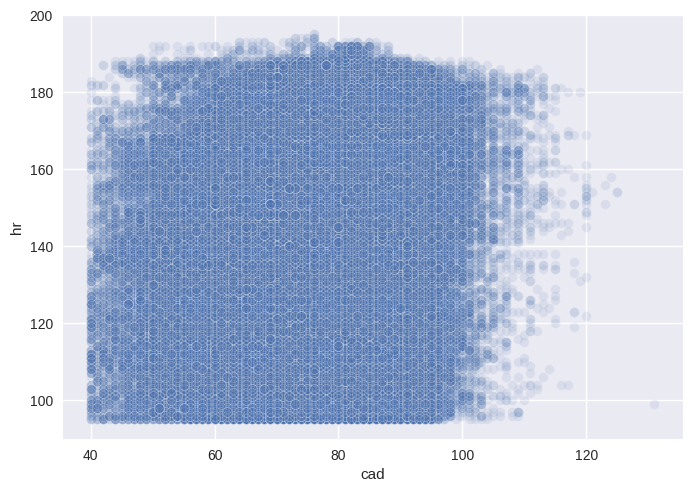

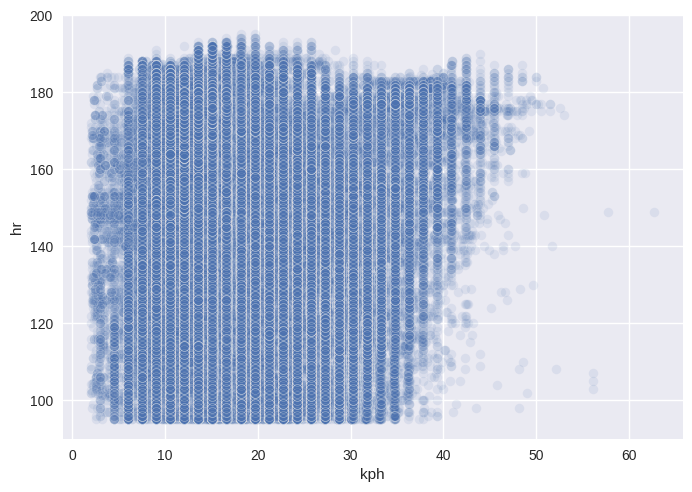

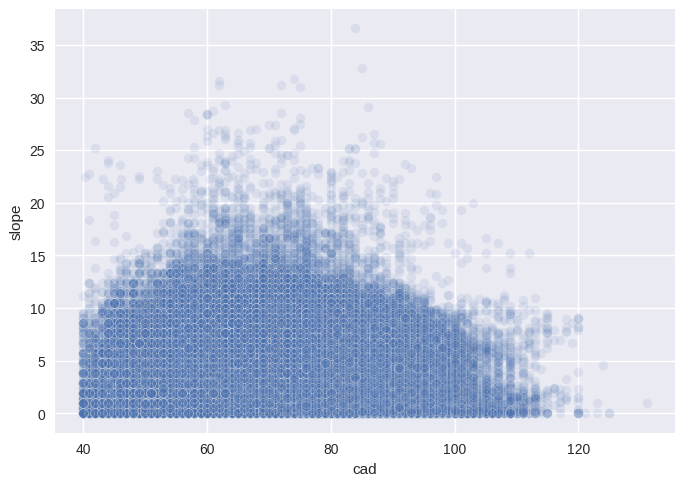

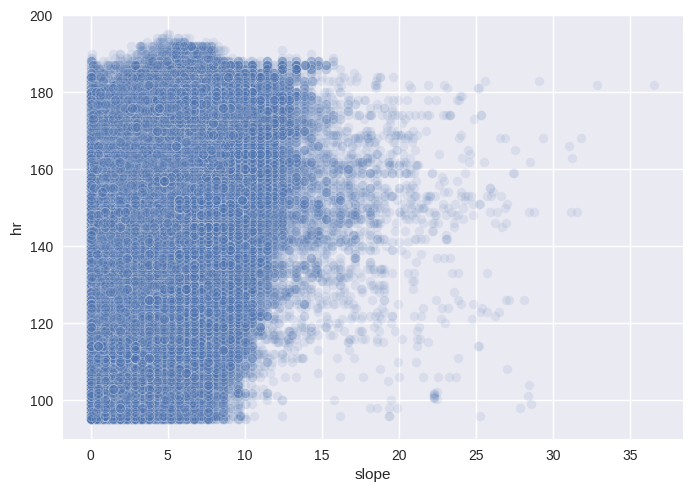

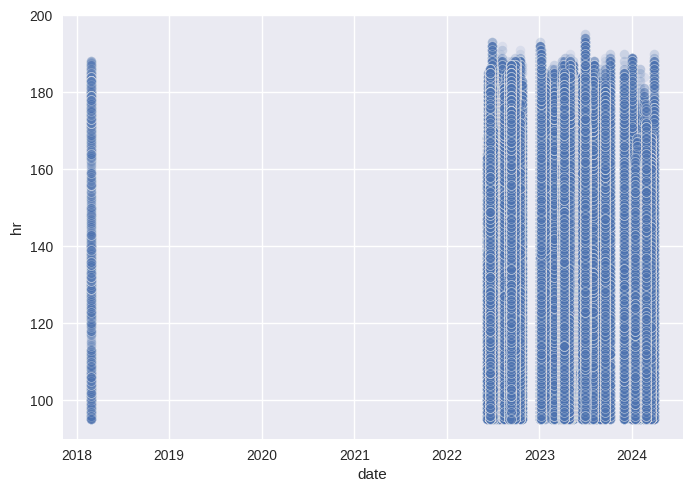

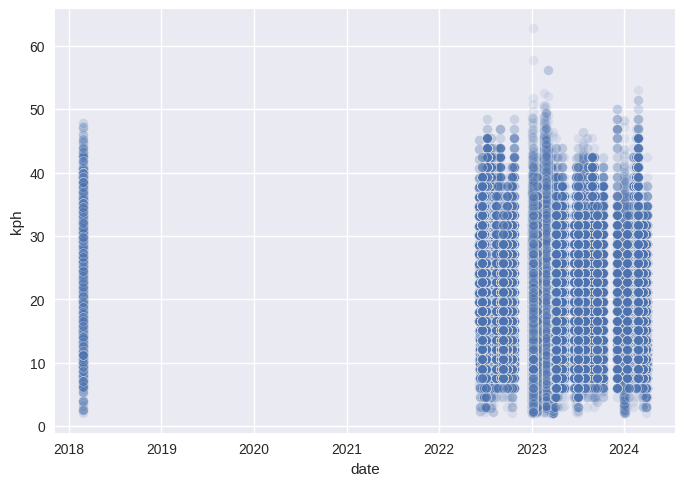

In [31]:
tuples: tuple[tuple[str]] = (
    ('cad', 'hr'),
    ('kph', 'hr'),
    ('cad', 'slope'),
    ('slope', 'hr'),
    ('date', 'hr'),
    ('date', 'kph'),
)

for x, y in tuples:
    sns.scatterplot(
        data,
        x=x,
        y=y,
        alpha=1/10
    )
    plt.show()

Solo se ve un patron en la relacion de slope y cad

Con el objetivo de comprender y validar relaciones que posiblemente no se tuvieron en cuenta, se realizará una matriz de correlación. Posteriormente, se graficarán las variables que tengan mayor relación.

In [32]:
corr = data.corr(numeric_only=True)

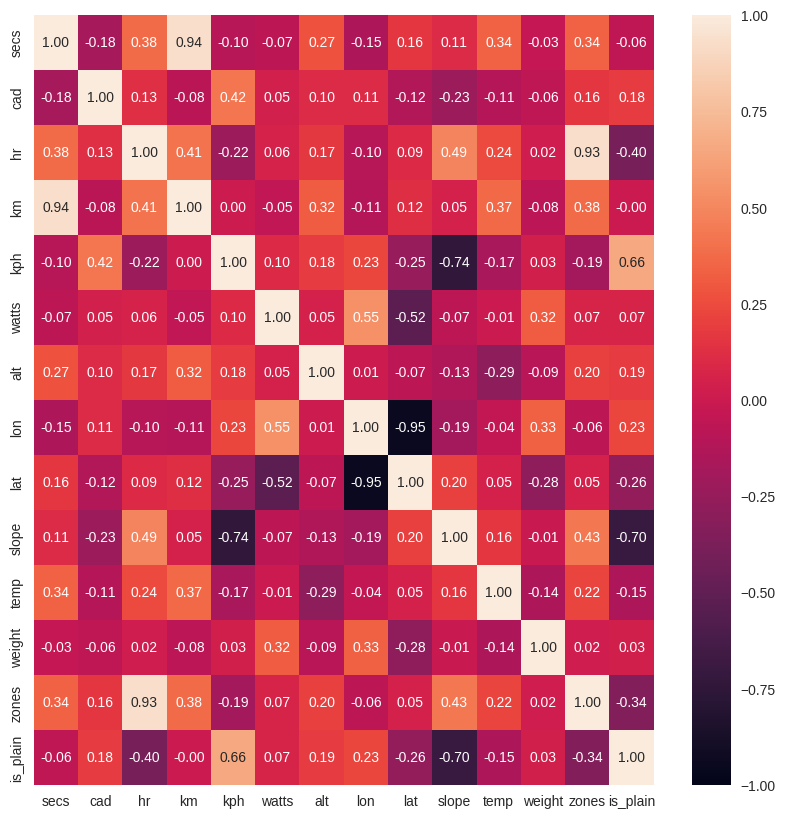

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(
    corr,
    vmax=1,
    vmin=-1,
    fmt='.2f',
    annot=True

)
plt.show()

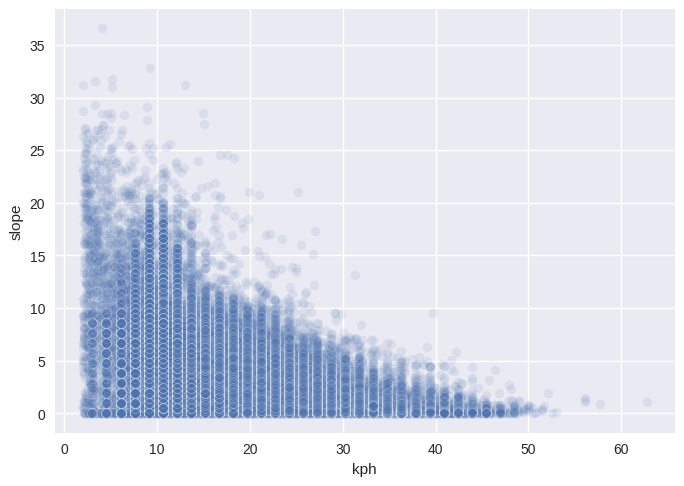

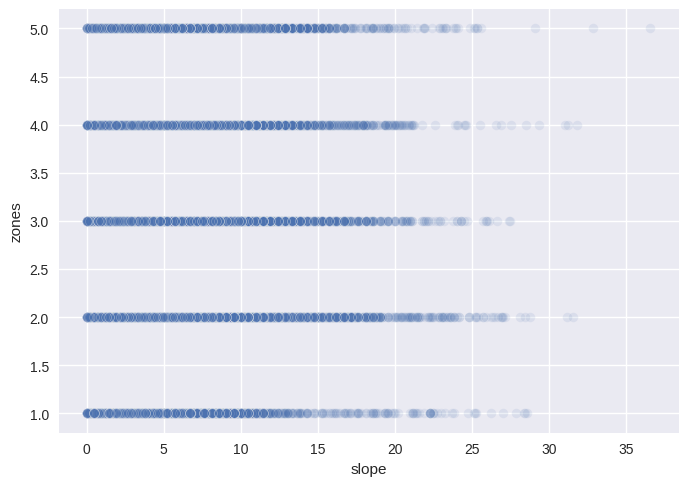

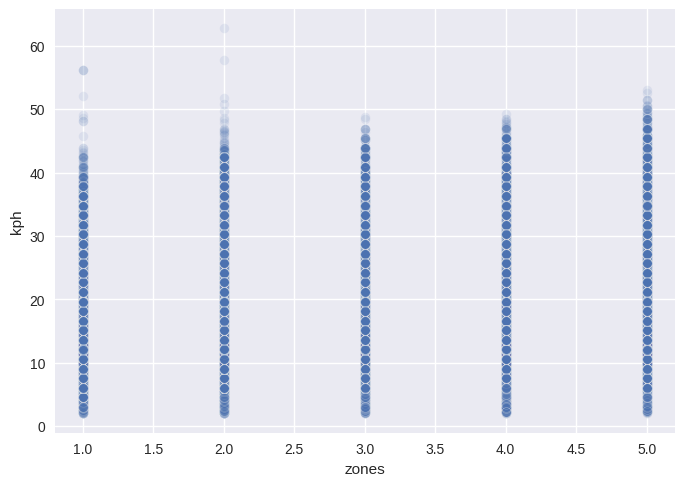

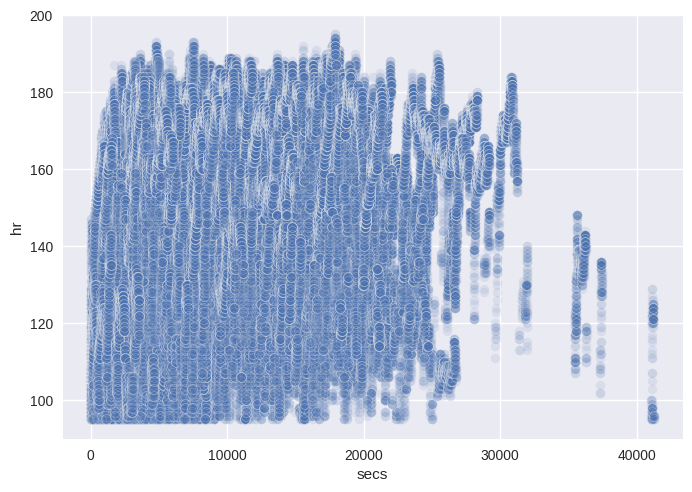

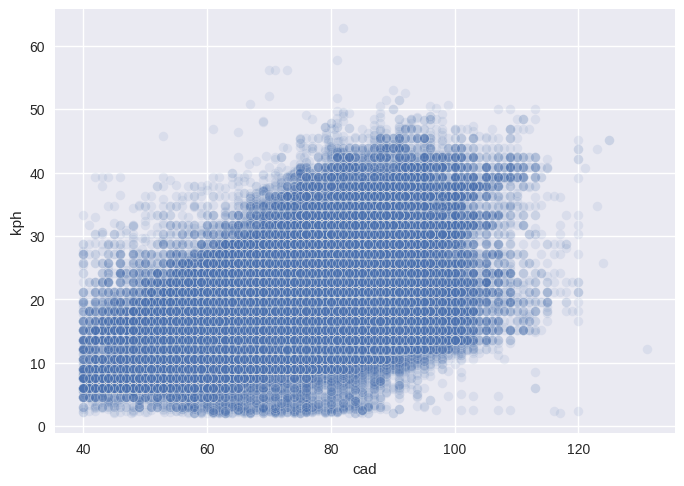

In [34]:
tuples: tuple[tuple[str]] = (
    ('kph', 'slope'),
    ('slope', 'zones'),
    ('zones', 'kph'),
    ('secs', 'hr'),
    ('cad', 'kph'),
)

for x, y in tuples:
    sns.scatterplot(
        data,
        x=x,
        y=y,
        alpha=1/10
    )
    plt.show()

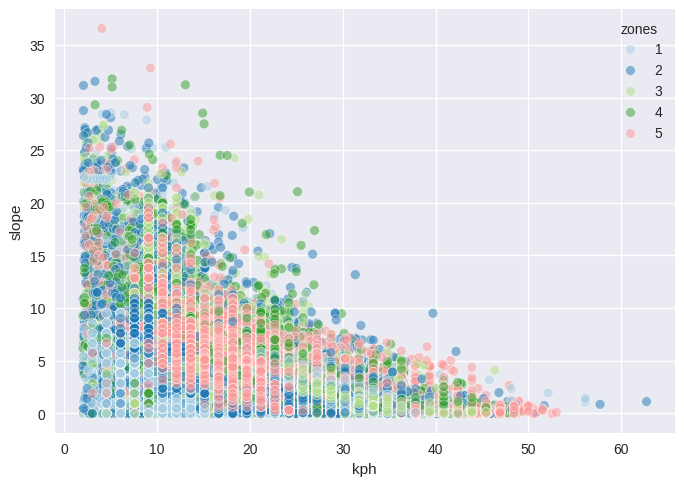

In [35]:
sns.scatterplot(
    data,
    x='kph',
    y='slope',
    alpha=1/2,
    hue='zones',
    palette='Paired'
)
plt.show()

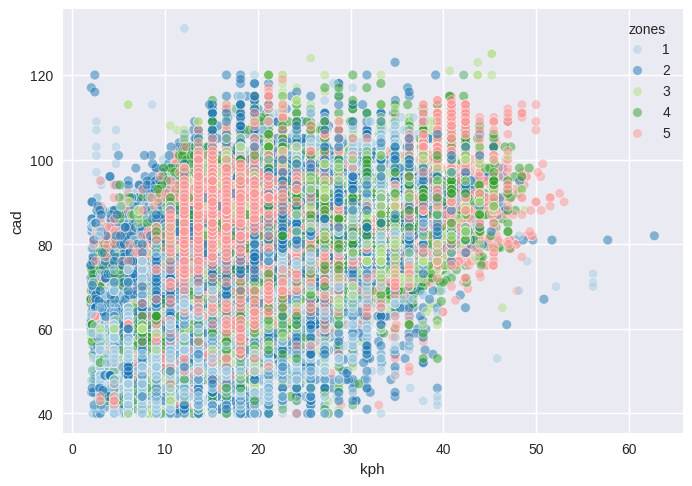

In [36]:
sns.scatterplot(
    data,
    x='kph',
    y='cad',
    alpha=1/2,
    hue='zones',
    palette='Paired'
)
plt.show()

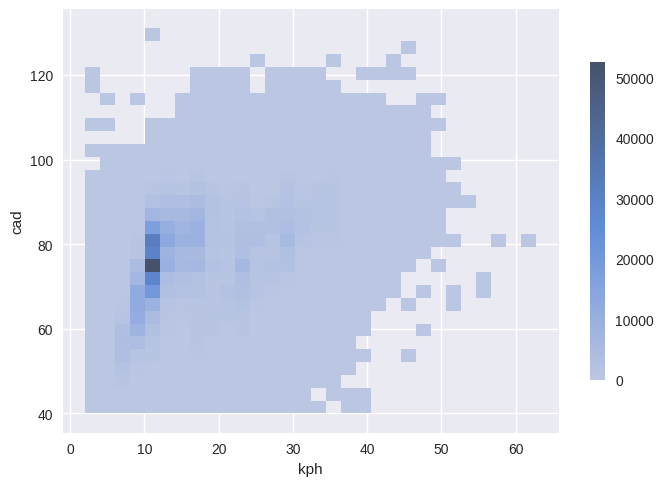

In [37]:
sns.histplot(
    data, x="kph", y="cad",
    bins=30, discrete=(False, False), 
    cbar=True, cbar_kws=dict(shrink=.75),
)
plt.show()

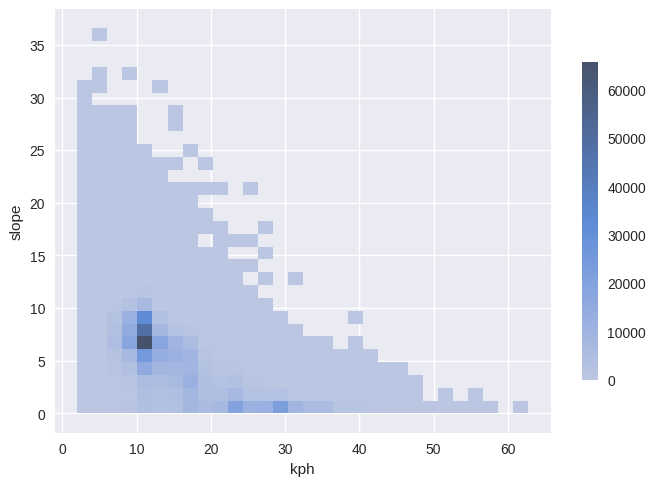

In [38]:
sns.histplot(
    data, x="kph", y="slope",
    bins=30, discrete=(False, False), 
    cbar=True, cbar_kws=dict(shrink=.75),
)
plt.show()

En este caso, como no se cuenta con un sensor de potencia que permita determinar los watts utilizados, se utilizará la función de trabajo mecánico, en la que se tendrá en cuenta la fuerza de resistencia a la rodadura y la fuerza gravitatoria necesaria para superar la pendiente. Sin embargo, dado que no se dispone de información del aire, no se podrá determinar la fuerza de resistencia al aire. En la veriable crr se agregará una constante para edicionar los efectos que no son tenidos en cuenta.


In [39]:
# https://www.triatlonrosario.com/2010/04/eleccion-de-neumaticos-para-bicicleta.html
def generate_w(
        slope: float, mass: float, 
        velocity_km_h: float, crr: float= 0.021
    ) -> float:
        gravity: float = 9.8
        if slope > 0:
            angle_radians: float = np.arctan(slope/100)
            f_g: float = mass * gravity * np.sin(angle_radians)
        else:
            f_g: float = 0
        f_r: float = mass * gravity * crr
        d: float = velocity_km_h * 1000 / (60 * 60)
        return d * (f_r + f_g)


In [40]:
bike_weight: float  = 11
data['w'] = data.apply(
    lambda x: generate_w(
        slope=x['slope'],
        mass=x['weight'] + bike_weight,
        velocity_km_h=x['kph']
    ),
    axis=1
)

Para continuar el análisis, se validará la relación que tiene la fuerza mecánica con la variable que termina si es terreno llano o terreno con elevación. Además, también se validará con otras variables.

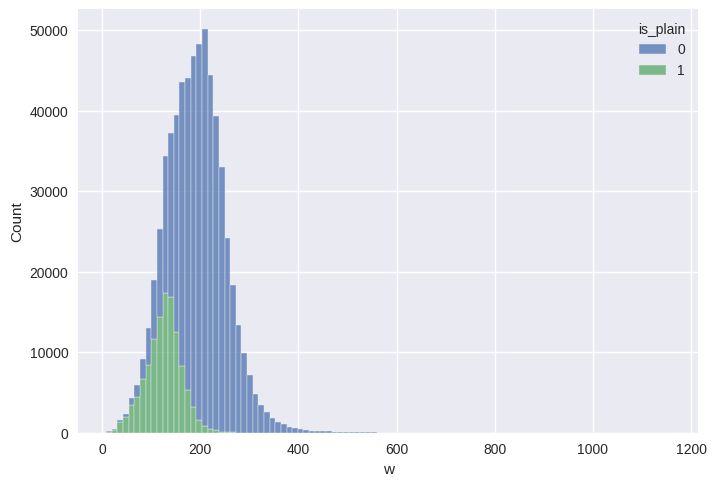

In [41]:
sns.histplot(
    data,
    x='w',
    hue='is_plain',
    bins=100,
    multiple='stack'
)
plt.show()

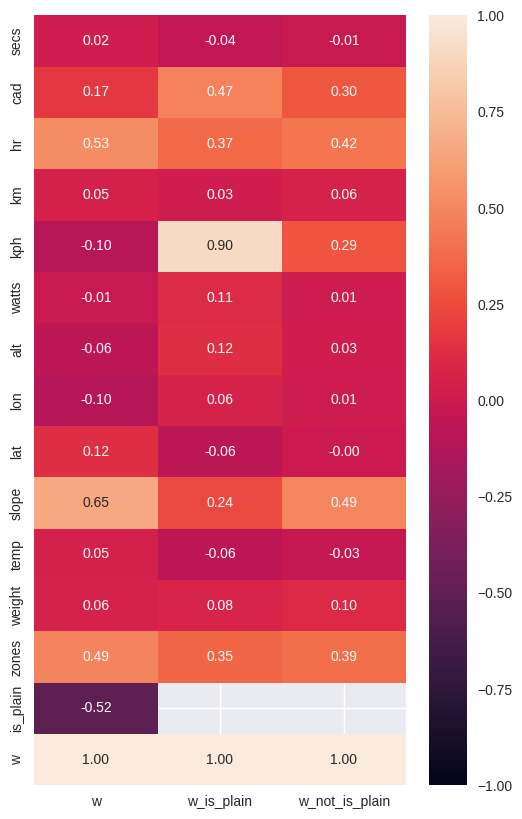

In [42]:
corr_full: DataFrame = data.corr(numeric_only=True)[['w']]
corr_is_plain: DataFrame = data[data['is_plain'] == 1].corr(
    numeric_only=True
)[['w']].rename(
    columns={
        'w': 'w_is_plain'
    }
)
corr_not_is_plain: DataFrame = data[data['is_plain'] == 0].corr(
    numeric_only=True
)[['w']].rename(
    columns={
        'w': 'w_not_is_plain'
    }
)

corr: DataFrame = pd.concat(
    [corr_full, corr_is_plain, corr_not_is_plain],
    axis=1
)



plt.figure(figsize=(6,10))
sns.heatmap(
    corr,
    vmax=1,
    vmin=-1,
    fmt='.2f',
    annot=True

)
plt.show()

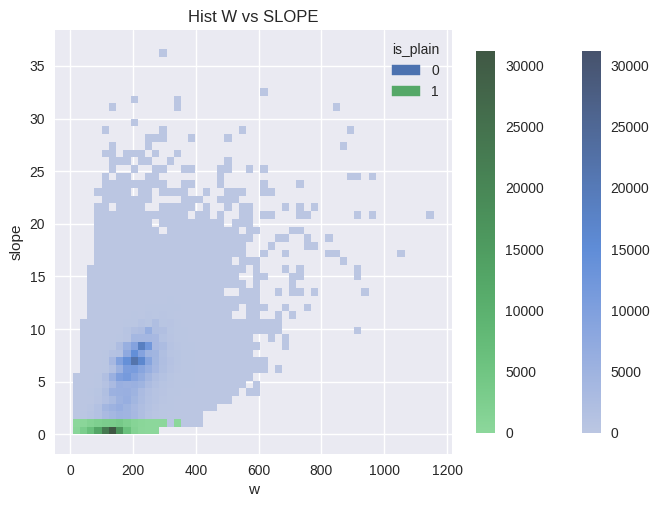

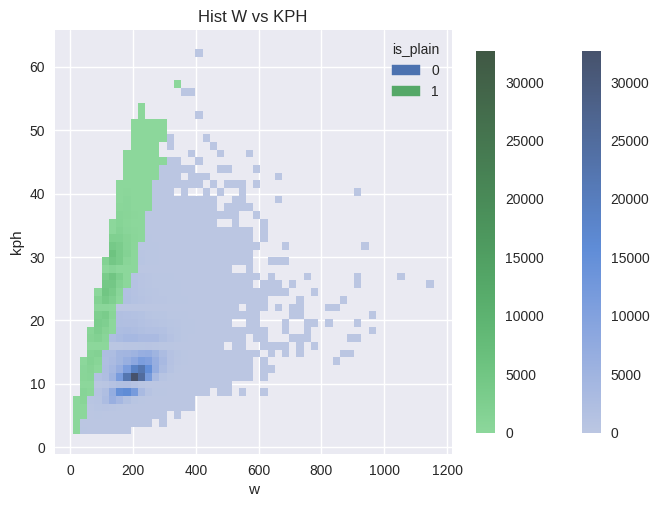

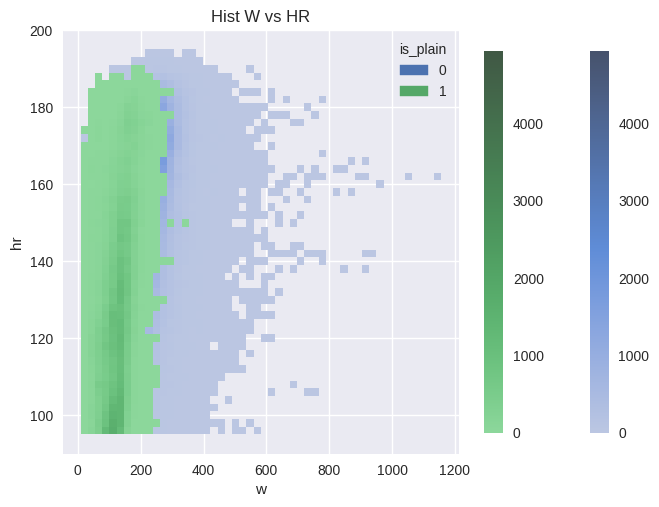

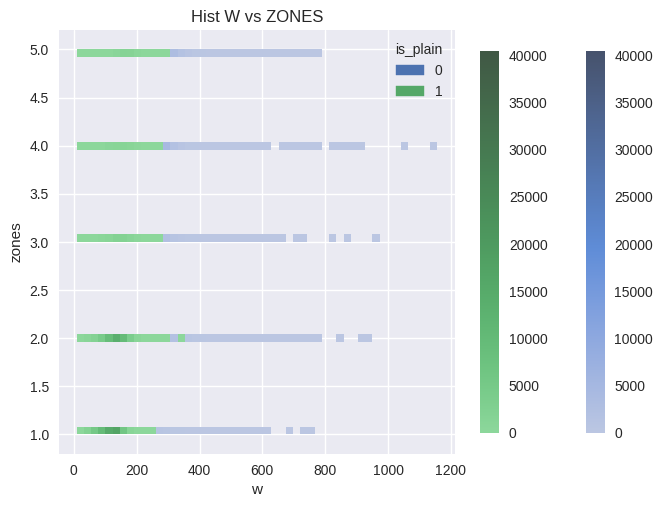

In [43]:
tuples: tuple[tuple[str]] = (
    ('w', 'slope'),
    ('w', 'kph'),
    ('w', 'hr'),
    ('w', 'zones'),
)

for x, y in tuples:

    sns.histplot(
    data, x=x, y=y,
    bins=50, discrete=(False, False), 
    cbar=True, cbar_kws=dict(shrink=0.9),
    hue='is_plain'
    )
    plt.title('Hist {} vs {}'.format(
            x.upper(), y.upper()
        ))
    plt.show()

Para crear la variable que permita determinar el nivel de eficiencia, se tomará en cuenta la variable de trabajo mecánico por kilogramo para determinar el esfuerzo y la zona cardiaca para determinar el esfuerzo energético.

In [44]:
data['w_hr'] = data['w'] / data['hr']
data[['w', 'w_hr']].describe()

w           w_hr
count  633163.000000  633163.000000
mean      190.471513       1.301898
std        60.530102       0.364886
min         8.707316       0.053749
25%       147.967013       1.082957
50%       189.718708       1.284853
75%       228.235117       1.489775
max      1156.663561       7.184246

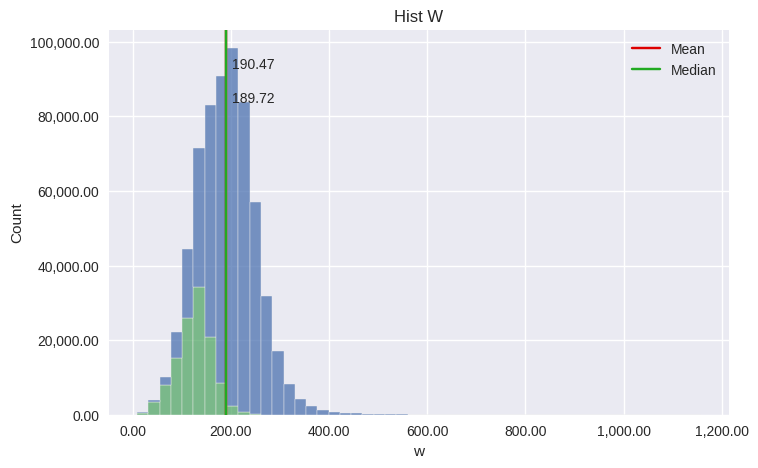

In [45]:
hist(data, 'w', bins=50, hue='is_plain')

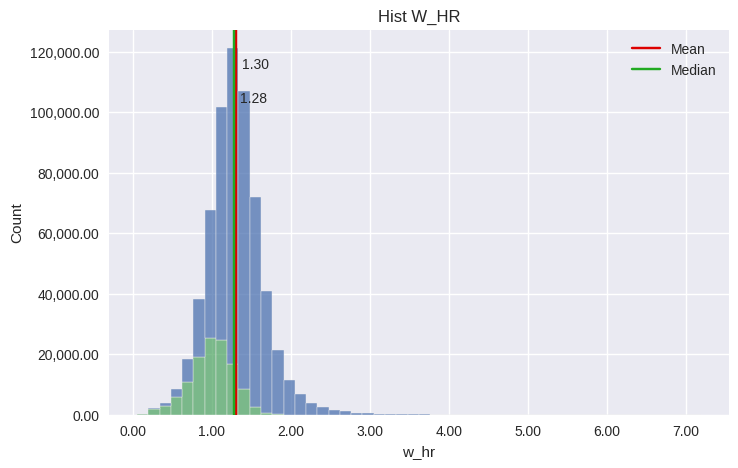

In [46]:
hist(data, 'w_hr', bins=50, hue='is_plain')

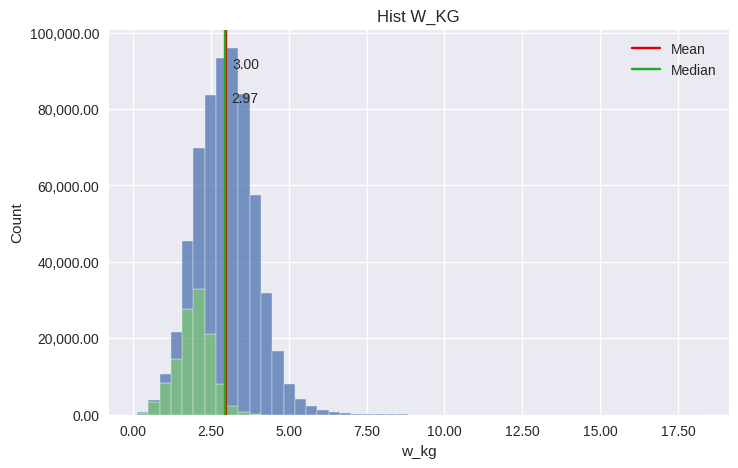

In [47]:
data['w_kg'] = data['w'] / data['weight']
hist(data, 'w_kg', bins=50, hue='is_plain')

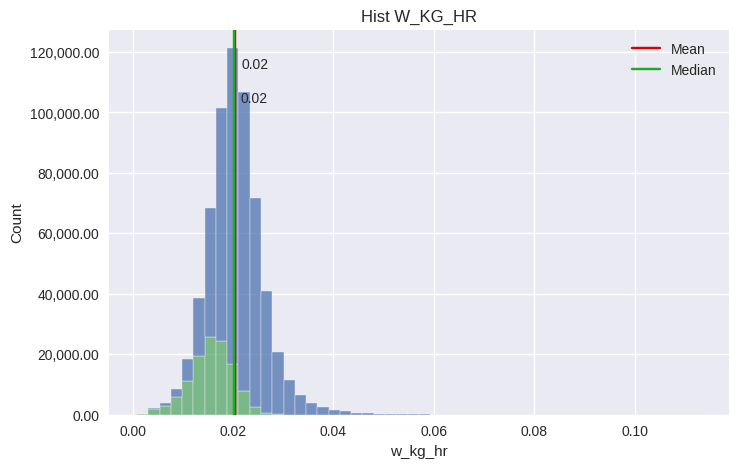

In [48]:
data['w_kg_hr'] = data['w_kg'] / data['hr']
hist(data, 'w_kg_hr', bins=50, hue='is_plain')

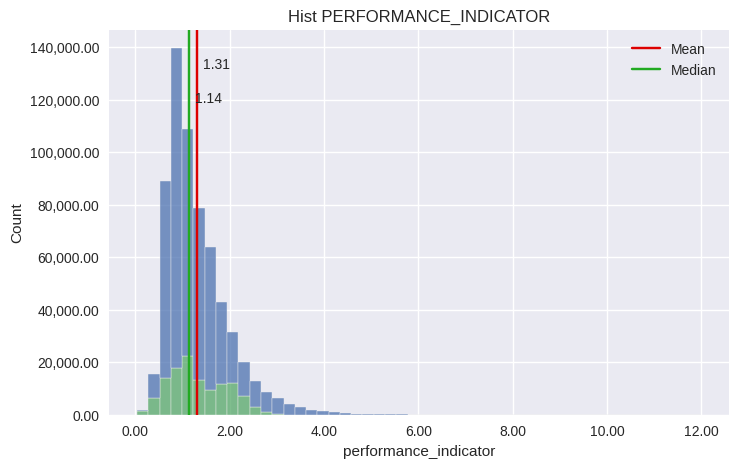

In [49]:
data['performance_indicator'] = data['w_kg'] / data['zones']
hist(data, 'performance_indicator', bins=50, hue='is_plain')

In [50]:
data.sample(5)

secs   cad     hr       km      kph  watts     alt        lon  \
155824  16183  61.0  143.0  58.5777   5.0040    0.0  2663.4 -73.943633   
117664   7508  64.0  130.0  29.7201   9.0720    0.0  1501.2 -74.321633   
576498  10453  63.0  140.0  46.7230   9.0720    0.0  1381.4 -74.459263   
409281   1470  74.0  103.0   8.3573  30.2616    0.0  2599.6 -74.219493   
613542  14837  71.0  132.0  60.7425  19.6560    0.0  2664.0 -74.178671   

             lat      slope  ...            datetime       date weight  zones  \
155824  4.554468  14.284800  ... 2023-03-26 06:25:10 2023-03-26   62.2      2   
117664  4.979505   6.666670  ... 2024-03-30 05:46:03 2024-03-30   63.2      2   
576498  4.633652   4.285710  ... 2022-09-11 08:14:47 2022-09-11   63.5      2   
409281  4.812725   0.929705  ... 2024-02-18 07:50:03 2024-02-18   62.3      1   
613542  4.922347   0.317460  ... 2024-01-14 07:27:30 2024-01-14   61.7      2   

        is_plain           w      w_hr      w_kg   w_kg_hr  \
155824         0  161.946427  1.132492  2.603640  0.018207   
117664         0  160.373676  1.233644  2.537558  0.019520   
576498         0  117.415299  0.838681  1.849060  0.013208   
409281         1  182.942252  1.776138  2.936473  0.028509   
613542         1   94.039896  0.712423  1.524147  0.011547   

        performance_indicator  
155824               1.301820  
117664               1.268779  
576498               0.924530  
409281               2.936473  
613542               0.762074  

[5 rows x 21 columns]